In [1]:
import urllib
import requests 
from bs4 import BeautifulSoup
import json


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize

In [3]:
import time
import warnings
warnings.filterwarnings(action='ignore')
from IPython.display import Image


In [4]:
import os

In [5]:
pwd

'C:\\Users\\snm03\\Documents\\debbu\\gameData\\the_log'

# 게임 인기순위(y)와 pc방(x) 시각화

In [6]:
# 데이터 불러오기
df = pd.read_csv('C:/Users/snm03/Documents/debbu/gameData/the_log_data_manufac/the_log_col_pretty.csv')
df

,Unnamed: 0.1,num_week,Unnamed: 0,rank,name,genre,genre_share,pc_room_num,total_time_hour,mean_time_min,total_use_num,distributor
0,0,0,0,1,배틀그라운드,FPS,70.89,"9,407","11,407,612",92.0,"7,464,234",카카오/스팀
1,1,0,2,2,리그 오브 레전드,RTS,86.69,"9,524","6,938,099",94.0,"4,448,793",라이엇게임즈
2,2,0,4,3,오버워치,FPS,19.23,"9,430","3,094,425",74.0,"2,521,406",블리자드
3,3,0,6,4,서든어택,FPS,8.31,"9,326","1,335,868",68.0,"1,182,326",넥슨
4,4,0,8,5,던전앤파이터,액션,70.33,"8,899","816,895",83.0,"580,764",넥슨
...,...,...,...,...,...,...,...,...,...,...,...,...
8575,8575,0,50,26,검은사막,RPG,1.49,"1,301","43,977",146.0,"18,083",(주)펄어비스
8576,8576,0,52,27,블레이드 & 소울,RPG,1.43,"1,036","42,326",116.0,"21,942",엔씨소프트
8577,8577,0,54,28,크레이지아케이드,아케이드,56.40,"2,428","38,489",41.0,"56,884",넥슨
8578,8578,0,56,29,엘소드,RPG,1.29,"1,244","38,013",116.0,"18,839",넥슨


In [12]:
# 컬럼명 바꾸기
df.rename(columns = {'Unnamed: 0.1':'index_num'},inplace=True)
df

,index_num,num_week,Unnamed: 0,rank,name,genre,genre_share,pc_room_num,total_time_hour,mean_time_min,total_use_num,distributor
0,0,0,0,1,배틀그라운드,FPS,70.89,"9,407","11,407,612",92.0,"7,464,234",카카오/스팀
1,1,0,2,2,리그 오브 레전드,RTS,86.69,"9,524","6,938,099",94.0,"4,448,793",라이엇게임즈
2,2,0,4,3,오버워치,FPS,19.23,"9,430","3,094,425",74.0,"2,521,406",블리자드
3,3,0,6,4,서든어택,FPS,8.31,"9,326","1,335,868",68.0,"1,182,326",넥슨
4,4,0,8,5,던전앤파이터,액션,70.33,"8,899","816,895",83.0,"580,764",넥슨
...,...,...,...,...,...,...,...,...,...,...,...,...
8575,8575,0,50,26,검은사막,RPG,1.49,"1,301","43,977",146.0,"18,083",(주)펄어비스
8576,8576,0,52,27,블레이드 & 소울,RPG,1.43,"1,036","42,326",116.0,"21,942",엔씨소프트
8577,8577,0,54,28,크레이지아케이드,아케이드,56.40,"2,428","38,489",41.0,"56,884",넥슨
8578,8578,0,56,29,엘소드,RPG,1.29,"1,244","38,013",116.0,"18,839",넥슨


In [13]:
# 주간번호 부여하기
share = 285 - df['index_num']//30
df['week_num'] = share
df

,index_num,num_week,Unnamed: 0,rank,name,genre,genre_share,pc_room_num,total_time_hour,mean_time_min,total_use_num,distributor,week_num
0,0,0,0,1,배틀그라운드,FPS,70.89,"9,407","11,407,612",92.0,"7,464,234",카카오/스팀,285
1,1,0,2,2,리그 오브 레전드,RTS,86.69,"9,524","6,938,099",94.0,"4,448,793",라이엇게임즈,285
2,2,0,4,3,오버워치,FPS,19.23,"9,430","3,094,425",74.0,"2,521,406",블리자드,285
3,3,0,6,4,서든어택,FPS,8.31,"9,326","1,335,868",68.0,"1,182,326",넥슨,285
4,4,0,8,5,던전앤파이터,액션,70.33,"8,899","816,895",83.0,"580,764",넥슨,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8575,8575,0,50,26,검은사막,RPG,1.49,"1,301","43,977",146.0,"18,083",(주)펄어비스,0
8576,8576,0,52,27,블레이드 & 소울,RPG,1.43,"1,036","42,326",116.0,"21,942",엔씨소프트,0
8577,8577,0,54,28,크레이지아케이드,아케이드,56.40,"2,428","38,489",41.0,"56,884",넥슨,0
8578,8578,0,56,29,엘소드,RPG,1.29,"1,244","38,013",116.0,"18,839",넥슨,0


In [14]:
# 새로운 csv파일로 저장
os.chdir('C:/Users/snm03/Documents/debbu/gameData/')
df.to_csv('C:/Users/snm03/Documents/debbu/gameData/the_log_data_manufac/the_log_weeknum.csv')

In [ ]:
# 컬럼명 바꾸기
# df.rename(columns = {'tablescraper-selected-row':'rank', #순위
#                      'tablescraper-selected-row 2' : 'genre', #장르 (RTS, 스포츠, FPS, RPG ..)
#                      'tablescraper-selected-row 3' : 'genre_share', #장르점유율
#                      'num' : 'pc_room_num', #실행PC방수
#                      'num 2' : 'total_time_hour', #총사용 (시간)
#                      'num 3' : 'mean_time_min', #평균사용(분)
#                      'num 4' : 'total_use_num', #총사용횟수
#                      'tablescraper-selected-row 5' : 'distributor'}, # 유통사
#           inplace=True) 

# 배틀그라운드

In [15]:
# 데이터 불러오기
df = pd.read_csv('C:/Users/snm03/Documents/debbu/gameData/the_log_data_manufac/the_log_weeknum.csv')
df

,Unnamed: 0.1,index_num,num_week,Unnamed: 0,rank,name,genre,genre_share,pc_room_num,total_time_hour,mean_time_min,total_use_num,distributor,week_num
0,0,0,0,0,1,배틀그라운드,FPS,70.89,"9,407","11,407,612",92.0,"7,464,234",카카오/스팀,285
1,1,1,0,2,2,리그 오브 레전드,RTS,86.69,"9,524","6,938,099",94.0,"4,448,793",라이엇게임즈,285
2,2,2,0,4,3,오버워치,FPS,19.23,"9,430","3,094,425",74.0,"2,521,406",블리자드,285
3,3,3,0,6,4,서든어택,FPS,8.31,"9,326","1,335,868",68.0,"1,182,326",넥슨,285
4,4,4,0,8,5,던전앤파이터,액션,70.33,"8,899","816,895",83.0,"580,764",넥슨,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8575,8575,8575,0,50,26,검은사막,RPG,1.49,"1,301","43,977",146.0,"18,083",(주)펄어비스,0
8576,8576,8576,0,52,27,블레이드 & 소울,RPG,1.43,"1,036","42,326",116.0,"21,942",엔씨소프트,0
8577,8577,8577,0,54,28,크레이지아케이드,아케이드,56.40,"2,428","38,489",41.0,"56,884",넥슨,0
8578,8578,8578,0,56,29,엘소드,RPG,1.29,"1,244","38,013",116.0,"18,839",넥슨,0


In [21]:
# 배틀그라운드 : bg
bg = df.loc[df['name']=='배틀그라운드']
bg

,Unnamed: 0.1,index_num,num_week,Unnamed: 0,rank,name,genre,genre_share,pc_room_num,total_time_hour,mean_time_min,total_use_num,distributor,week_num
0,0,0,0,0,1,배틀그라운드,FPS,70.89,"9,407","11,407,612",92.0,"7,464,234",카카오/스팀,285
30,30,30,0,0,1,배틀그라운드,FPS,71.49,"9,408","13,105,093",91.0,"8,719,927",카카오/스팀,284
60,60,60,0,0,1,배틀그라운드,FPS,73.25,"9,421","13,520,589",94.0,"8,656,803",카카오/스팀,283
90,90,90,0,0,1,배틀그라운드,FPS,73.48,"9,441","13,802,260",87.0,"9,721,847",카카오/스팀,282
120,120,120,0,0,1,배틀그라운드,FPS,75.33,"9,473","8,523,500",83.0,"6,218,599",카카오/스팀,281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8435,8435,8435,0,10,6,배틀그라운드,FPS,23.69,"5,927","811,553",83.0,"586,348",카카오/스팀,4
8468,8468,8468,0,16,9,배틀그라운드,FPS,13.01,"3,319","371,796",77.0,"258,407",카카오/스팀,3
8496,8496,8496,0,12,7,배틀그라운드,FPS,20.14,"5,126","658,014",83.0,"469,815",카카오/스팀,2
8524,8524,8524,0,8,5,배틀그라운드,FPS,25.39,"5,985","882,706",88.0,"600,416",카카오/스팀,1


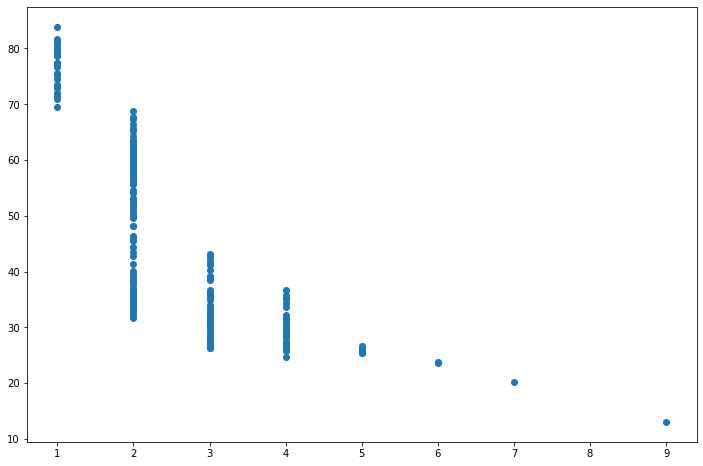

In [22]:
# rank와 genre_share
plt.figure(figsize=(12,8))
plt.scatter(bg['rank'],bg['genre_share'])
plt.show()

# 순위가 높을 수록 장르 점유가 높았다

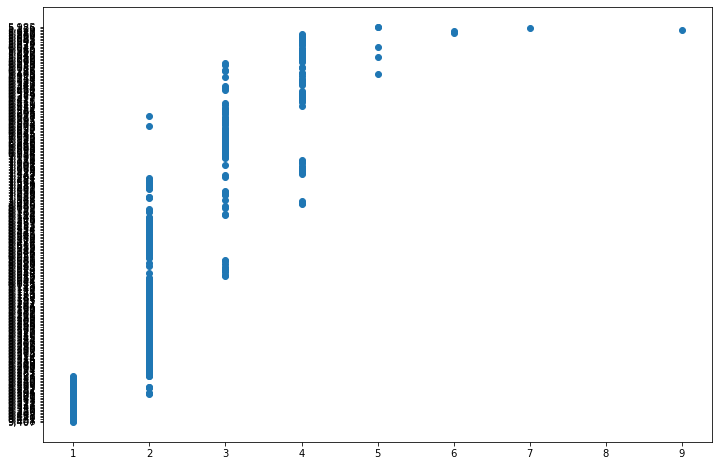

In [25]:
# rank와 pc_room_num
plt.figure(figsize=(12,8))
plt.scatter(bg['rank'],bg['pc_room_num'])
plt.show()
# 순위가 낮을 수록 실행PC방수가 낮았다

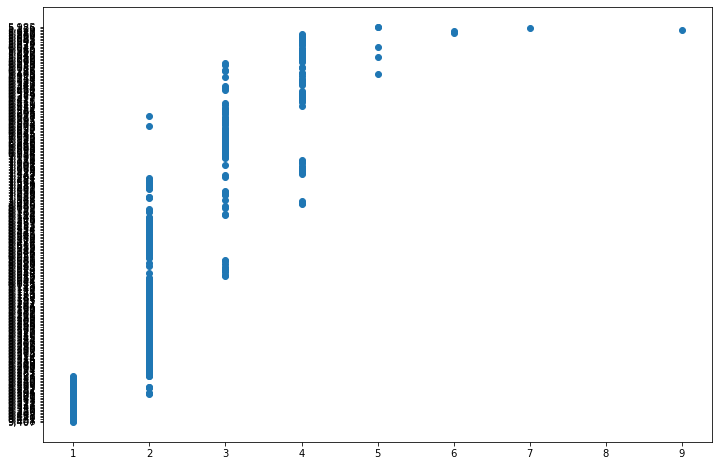

In [26]:
# rank와 total_time_hour
plt.figure(figsize=(12,8))
plt.scatter(bg['rank'],bg['pc_room_num'])
plt.show()
# 순위가 낮을 수록 실행PC방수가 낮았다

## 배틀그라운드 - x축 = rank

In [27]:
# 그래프 x, y축 범위 설정
x1=np.arange(1,10)
y1=x1

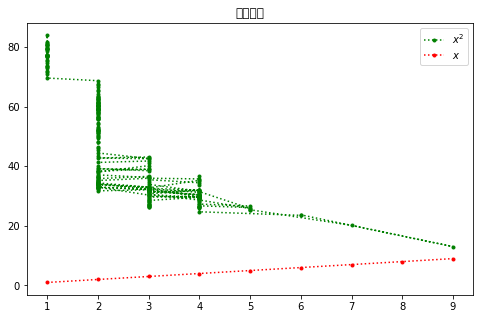

In [28]:
# 랭킹과 장르점유율 상관관계 그래프

plt.figure(figsize=(8,5)) # 그래프가 그려지는 캔버스 크기 설정
plt.plot(bg['rank'],bg['genre_share'], 'g.:', label='genre_share')
plt.plot(x1,y1, 'r.:', label='$x$' )  #선 그래프 정의
plt.title('상관관계') # 그래프 타이틀 지정 / $사용하면 수학기호 사용 가능
# plt.xlabel('$x$') # x축 설명
# plt.ylabel('$x^2$') # y축 설명
plt.legend(loc='best') # 범례
plt.show( ) # 정의된 그래프를 플로팅

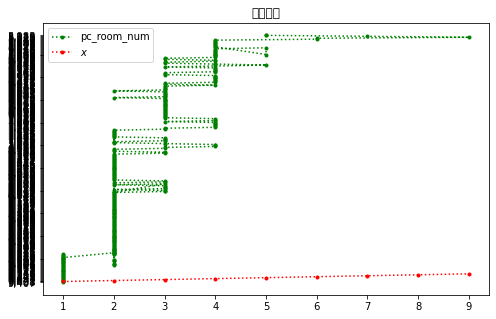

In [30]:
# 랭킹과 실행PC방수 상관관계 그래프

plt.figure(figsize=(8,5)) # 그래프가 그려지는 캔버스 크기 설정
plt.plot(bg['rank'],bg['pc_room_num'], 'g.:', label='pc_room_num') 
plt.plot(x1,y1, 'r.:', label='$x$' )  #선 그래프 정의
plt.title('상관관계') # 그래프 타이틀 지정 / $사용하면 수학기호 사용 가능
# plt.xlabel('$x$') # x축 설명
# plt.ylabel('$x^2$') # y축 설명
plt.legend(loc='best') # 범례
plt.show( ) # 정의된 그래프를 플로팅

In [ ]:
# 랭킹과 실행PC방수 상관관계 그래프

plt.figure(figsize=(8,5)) # 그래프가 그려지는 캔버스 크기 설정
plt.plot(bg['rank'],bg['pc_room_num'], 'g.:', label='pc_room_num') 
plt.plot(x1,y1, 'r.:', label='$x$' )  #선 그래프 정의
plt.title('상관관계') # 그래프 타이틀 지정 / $사용하면 수학기호 사용 가능
# plt.xlabel('$x$') # x축 설명
# plt.ylabel('$x^2$') # y축 설명
plt.legend(loc='best') # 범례
plt.show( ) # 정의된 그래프를 플로팅

## 배틀그라운드 - x축 = week_num

In [33]:
# 그래프 x, y축 범위 설정
x2=np.arange(1,300) 
y2=x2

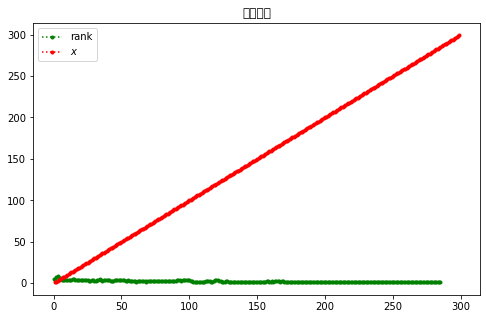

In [36]:
# 주간과 랭킹의 상관관계

plt.figure(figsize=(8,5)) # 그래프가 그려지는 캔버스 크기 설정
plt.plot(bg['week_num'],bg['rank'], 'g.:', label='rank') 
plt.plot(x2,y2, 'r.:', label='$x$' )  #선 그래프 정의
plt.title('상관관계') # 그래프 타이틀 지정 / $사용하면 수학기호 사용 가능
# plt.xlabel('$x$') # x축 설명
# plt.ylabel('$x^2$') # y축 설명
plt.legend(loc='best') # 범례
plt.show( ) # 정의된 그래프를 플로팅

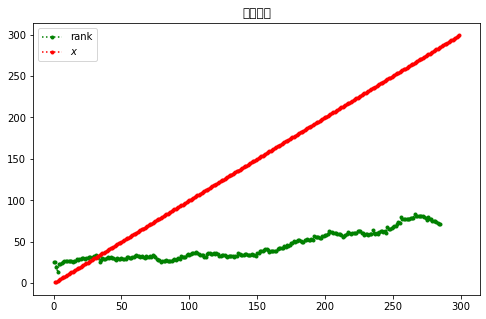

In [37]:
# 주간과 장르점유율의 상관관계

plt.figure(figsize=(8,5)) # 그래프가 그려지는 캔버스 크기 설정
plt.plot(bg['week_num'],bg['genre_share'], 'g.:', label='genre_share') 
plt.plot(x2,y2, 'r.:', label='$x$' )  #선 그래프 정의
plt.title('상관관계') # 그래프 타이틀 지정 / $사용하면 수학기호 사용 가능
# plt.xlabel('$x$') # x축 설명
# plt.ylabel('$x^2$') # y축 설명
plt.legend(loc='best') # 범례 
plt.show( ) # 정의된 그래프를 플로팅

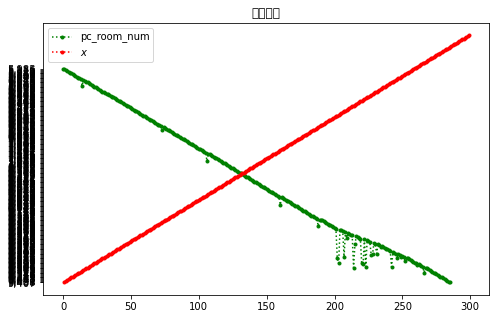

In [38]:
# 주간과 실행PC방수의 상관관계

plt.figure(figsize=(8,5)) # 그래프가 그려지는 캔버스 크기 설정
plt.plot(bg['week_num'],bg['pc_room_num'], 'g.:', label='pc_room_num') 
plt.plot(x2,y2, 'r.:', label='$x$' )  #선 그래프 정의
plt.title('상관관계') # 그래프 타이틀 지정 / $사용하면 수학기호 사용 가능
# plt.xlabel('$x$') # x축 설명
# plt.ylabel('$x^2$') # y축 설명
plt.legend(loc='best') # 범례 
plt.show( ) # 정의된 그래프를 플로팅

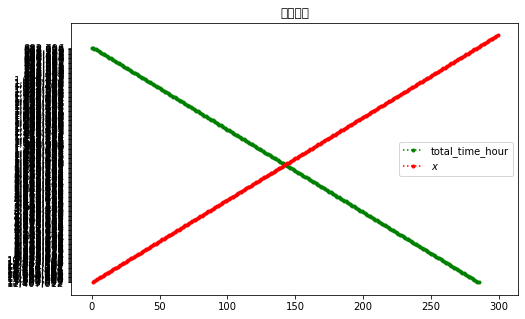

In [39]:
# 주간과 총사용(시간)의 상관관계

plt.figure(figsize=(8,5)) # 그래프가 그려지는 캔버스 크기 설정
plt.plot(bg['week_num'],bg['total_time_hour'], 'g.:', label='total_time_hour') 
plt.plot(x2,y2, 'r.:', label='$x$' )  #선 그래프 정의
plt.title('상관관계') # 그래프 타이틀 지정 / $사용하면 수학기호 사용 가능
# plt.xlabel('$x$') # x축 설명
# plt.ylabel('$x^2$') # y축 설명
plt.legend(loc='best') # 범례 
plt.show( ) # 정의된 그래프를 플로팅

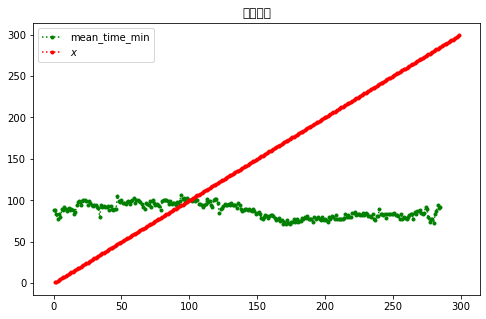

In [40]:
# 주간과 평균사용(분)의 상관관계

plt.figure(figsize=(8,5)) # 그래프가 그려지는 캔버스 크기 설정
plt.plot(bg['week_num'],bg['mean_time_min'], 'g.:', label='mean_time_min') 
plt.plot(x2,y2, 'r.:', label='$x$' )  #선 그래프 정의
plt.title('상관관계') # 그래프 타이틀 지정 / $사용하면 수학기호 사용 가능
# plt.xlabel('$x$') # x축 설명
# plt.ylabel('$x^2$') # y축 설명
plt.legend(loc='best') # 범례 
plt.show( ) # 정의된 그래프를 플로팅

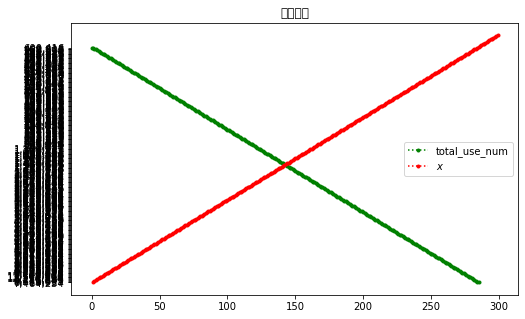

In [41]:
# 주간과 총사용횟수의 상관관계

plt.figure(figsize=(8,5)) # 그래프가 그려지는 캔버스 크기 설정
plt.plot(bg['week_num'],bg['total_use_num'], 'g.:', label='total_use_num') 
plt.plot(x2,y2, 'r.:', label='$x$' )  #선 그래프 정의
plt.title('상관관계') # 그래프 타이틀 지정 / $사용하면 수학기호 사용 가능
# plt.xlabel('$x$') # x축 설명
# plt.ylabel('$x^2$') # y축 설명
plt.legend(loc='best') # 범례 
plt.show( ) # 정의된 그래프를 플로팅